In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Buidling the Model

In [9]:
# Creating the object(Initializing the CNN)
model = tf.keras.models.Sequential()


In [10]:
# Adding first convolutional layer(input layer)
# 1. filters: number of filters = 64
# 2. kernel_size: size of the filter = 3x3
# 3. activation function = relu
# 4. input_shape: shape of the input image = (32, 32, 3)
# 5. padding = same

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(32, 32, 3), padding='same'))


In [11]:
# Adding maxpooling layer
# 1. pool_size: size of the filter = 2x2
# 2. strides = 2
# 3. padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))


In [12]:
# Adding second convolutional layer and maxpooling layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))




In [13]:
# Adding the Flatten layer
model.add(tf.keras.layers.Flatten())

In [14]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [15]:
# Adding the fully connected layer i.e. ANN
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [16]:
# Adding the output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the CNN to the images

In [18]:
# import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# rescaling the images
datagen = ImageDataGenerator(rescale=1./255)

In [20]:
training_set = datagen.flow_from_directory(directory='training_set', target_size=(32, 32), batch_size=20, class_mode='binary', classes=['cats', 'dogs'])
test_set = datagen.flow_from_directory(directory='test_set', target_size=(32, 32), batch_size=20, class_mode='binary', classes=['cats', 'dogs'])

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [21]:
len(training_set), len(test_set)

(401, 102)

In [22]:
history = model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=20, validation_data=test_set, validation_steps=len(test_set))

C:\Users\baral\AppData\Local\Temp\ipykernel_16676\3517838368.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set, steps_per_epoch=len(training_set), epochs=20, validation_data=test_set, validation_steps=len(test_set))


Epoch 1/20
401/401 [==============================] - 84s 207ms/step - loss: 0.6698 - accuracy: 0.5846 - val_loss: 0.6354 - val_accuracy: 0.6243
Epoch 2/20
401/401 [==============================] - 29s 73ms/step - loss: 0.6166 - accuracy: 0.6692 - val_loss: 0.5810 - val_accuracy: 0.7103
Epoch 3/20
401/401 [==============================] - 29s 71ms/step - loss: 0.5726 - accuracy: 0.7027 - val_loss: 0.5772 - val_accuracy: 0.6896
Epoch 4/20
401/401 [==============================] - 27s 66ms/step - loss: 0.5451 - accuracy: 0.7233 - val_loss: 0.5382 - val_accuracy: 0.7360
Epoch 5/20
401/401 [==============================] - 27s 67ms/step - loss: 0.5108 - accuracy: 0.7473 - val_loss: 0.5232 - val_accuracy: 0.7410
Epoch 6/20
401/401 [==============================] - 29s 72ms/step - loss: 0.4699 - accuracy: 0.7706 - val_loss: 0.5137 - val_accuracy: 0.7504
Epoch 7/20
401/401 [==============================] - 29s 71ms/step - loss: 0.4446 - accuracy: 0.7939 - val_loss: 0.5146 - val_accuracy

# Step 5: Plotting the Learning curves

In [24]:
def learning(history, epoch):
    # training vs validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    

    

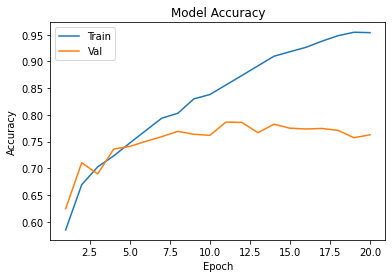

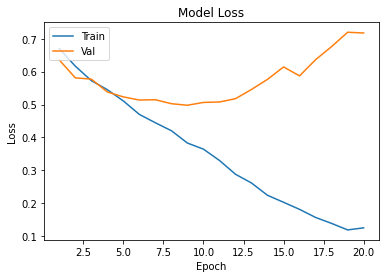

In [25]:
learning(history, 20)